<a href="https://colab.research.google.com/github/R123456-123/Clone-/blob/main/zomatodata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataframe = pd.read_csv("/content/Zomato-data.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [23]:
def handleRate(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [24]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

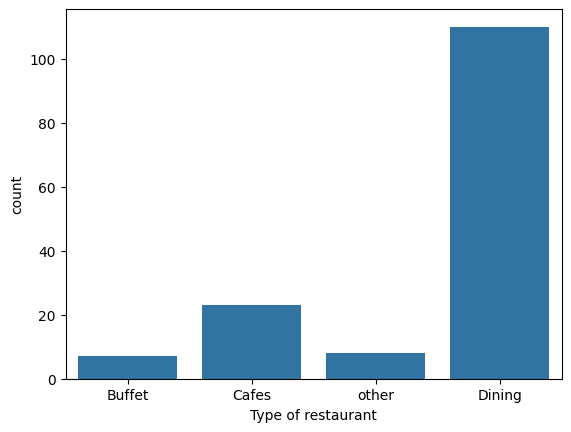

In [25]:
sns.countplot(x = dataframe['listed_in(type)'])
plt.xlabel('Type of restaurant')

Text(0, 0.5, 'Total votes')

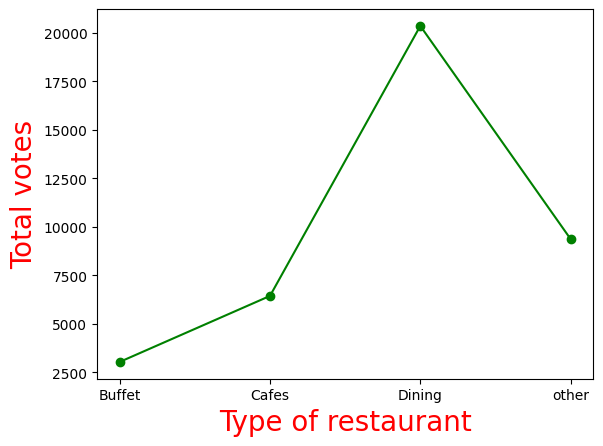

In [26]:
group_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': group_data})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Total votes', c='red', size=20)

In [27]:
max_votes = dataframe['votes'].max()
restaurant_with_max = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('Restaurant(s) with maximum votes: ')
print(restaurant_with_max)

Restaurant(s) with maximum votes: 
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

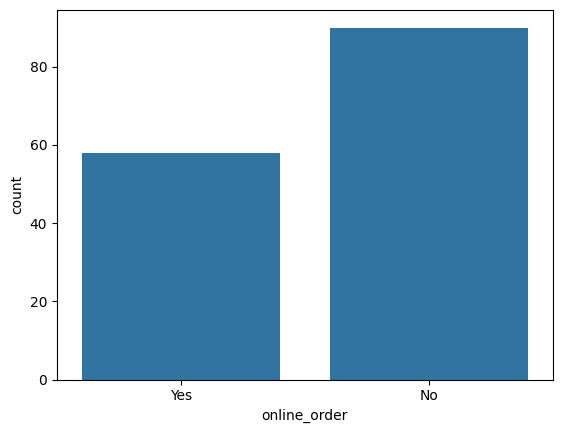

In [28]:
sns.countplot(x=dataframe['online_order'])

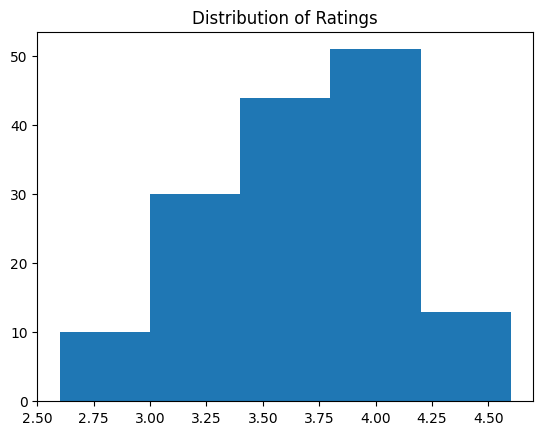

In [29]:
plt.hist(dataframe['rate'],bins=5)
plt.title('Distribution of Ratings')
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

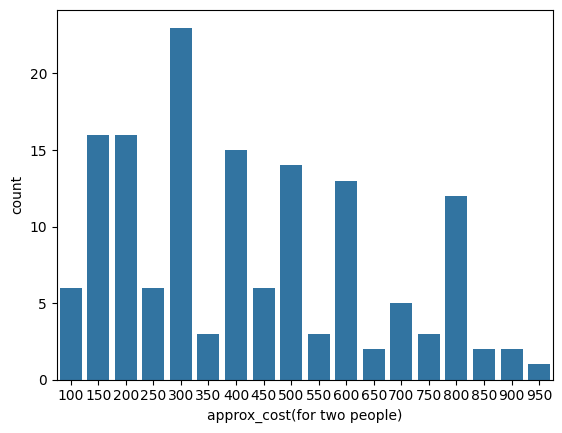

In [30]:
couple_count = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_count)

<Axes: xlabel='online_order', ylabel='rate'>

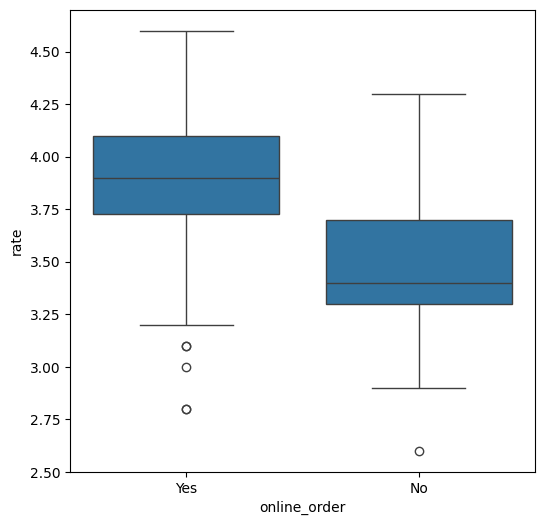

In [32]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data = dataframe)

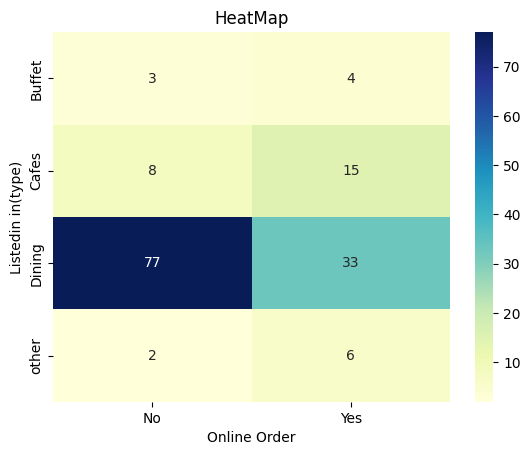

In [36]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('HeatMap')
plt.xlabel('Online Order')
plt.ylabel('Listedin in(type)')
plt.show()